# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Estimated Charges Mean: 13270.42
Estimated Charges Std Deviation: 12105.48


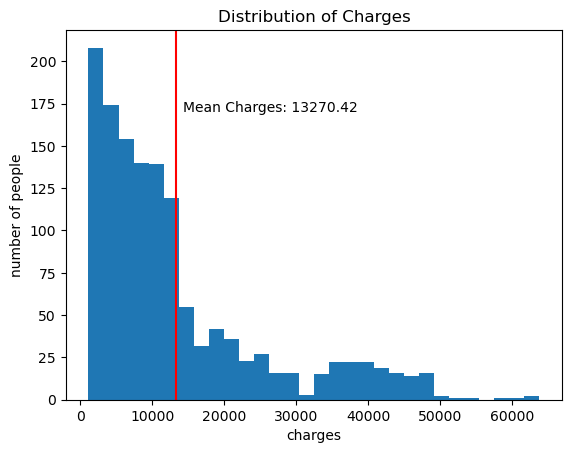

In [5]:
_ = plt.hist(medical['charges'], bins = 30)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Charges')
_ = plt.axvline(np.mean(medical['charges']), color='r')
_ = plt.annotate(f"Mean Charges: {round(np.mean(medical['charges']),2)}", xy=(np.mean(medical['charges']) + 1000 ,170))

print (f"Estimated Charges Mean: {round(np.mean(medical['charges']),2)}")
print (f"Estimated Charges Std Deviation: {round(np.std(medical['charges']),2)}")

#print (f"Estimated Charges Median: {round(np.median(medical['charges']),2)}")

In [37]:
# The charges are skewed to the right, which makes sense because the cases of extreme costs are lower than mean sample cost of 13270.42

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can use our sample data to get 95% CI interval for average charge and check if it includes value of 12,000 or lower.

Since we don't have sufficient knowledge regarding population standard deviation, using t-distribution and focusing on what our sample tells us would be most appropriate test.

In [ ]:
# empty cell as a break b/w questions

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given that concern is regarding the lowest average charge and comparison with 12,000 USD, a one-sided interval would be appropriate. 
As we don't care about the highest value of charge in CI, using one sided test we have calculated our CI below which shows that most likely average charge is still over 12,000

In [9]:
# for 95% CI we look to get crtical t values
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges']) 


confidence_level = 0.95
alpha = 0.05
dof = 1338 - 1 #number of samples minus 1

t_critical = np.abs(t.ppf((alpha),dof)) #we are not dividing alpha by 2 here as we are doing one sided test

margin_of_error = t_critical * (sample_std/np.sqrt(1338)) #here our sample size is 50

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Critial t value: {t_critical}")
print(f"Margin of Error is: {margin_of_error}")
print (f"95% confidence_interval is: {confidence_interval}")

Critial t value: 1.6459941145571324
Margin of Error is: 544.7314053390936
95% confidence_interval is: (12725.690859802164, 13815.15367048035)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

Null Hypothesis: Mean charges for poeple with and without insurance is same
Alternate Hypothesis: Mean charges for the two groups is not same


The above formula is for Equal variance or Pooled t-test, we are assuming that number of samples in both group are same. Also, as far as variance goes this is assuming that variance of two groups is similar.


In [ ]:
# empty cell as a break b/w questions

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [14]:
#manual hypothesis test
charges_without_insurance = medical['charges'][medical['insuranceclaim'] == 0]
charges_with_insurance = medical['charges'][medical['insuranceclaim'] == 1]

In [53]:
n0 = len(charges_without_insurance)
n1 = len(charges_with_insurance)

s0 = np.std(charges_without_insurance)
s1 = np.std(charges_with_insurance)

pooled_std =  np.sqrt((((n0 - 1)*(s0**2)) + ((n1 - 1)*(s1**2))) / (n0 + n1 - 2))

#print(n0, n1, s0, s1)
print(pooled_std)

11512.282899205744


In [54]:
x0 =  np.mean(charges_without_insurance)
x1 = np.mean(charges_with_insurance)

t_manual = (x0 - x1) / (pooled_std * np.sqrt((1/n0)  + (1/n1)))

#print(x0, x1)
print(t_manual)

-11.90130694355539


In [ ]:
# With dof of 1336 (1338 -2) and t value of 11.9 we can safely say that there is less than 0.0005% chance that null hypothesis is true.
#Therefore as per manual check we can safely reject null hypothesis and conclude that folks with insurance are charged different amounts

In [55]:
# scipy calculation

t,p = ttest_ind(charges_without_insurance, charges_with_insurance, equal_var = True)

print(f"Calculated t value us: {t}")
print(f"Calculated probability that null hypothesis is true: {p}")

Calculated t value us: -11.893299030876712
Calculated probability that null hypothesis is true: 4.461230231620717e-31


In [ ]:
#As per both tests we reject null hypothesis

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ We do not see one performing z-test from a sample as  z-test is better suited for when we know population standard deviations and want to compare two populations.

This is not such a realistic feat, often we are working with samples with population values unkown. In such cases t-test is better choice, to focus on samples and let of population guess work.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test